# stones detection

In [1]:
import mmcv
from mmcv import Config
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import matplotlib.pyplot as plt
import numpy as np


In [2]:
cfg = Config.fromfile('configs/custom_maskrcnn.py')

In [3]:
print(cfg.pretty_text)

classes = ['stone']
CLASSES = ['stone']
num_classes = 2
model = dict(
    type='MaskRCNN',
    pretrained=None,
    backbone=dict(
        type='ResNet',
        in_channels=1,
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch'),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=

In [4]:
cfg.data.samples_per_gpu=1 

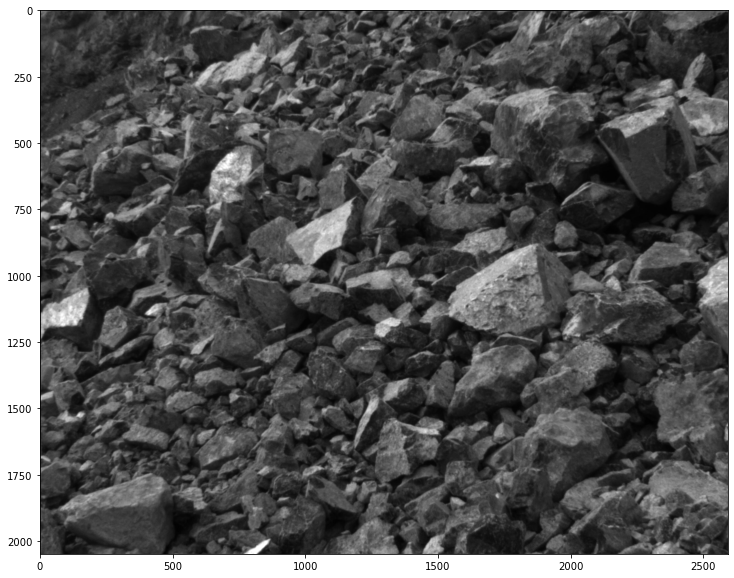

In [5]:
img = mmcv.imread('/home/euloo/Documents/datasets/stones_detection/images/5.jpg', flag='grayscale')
plt.figure(figsize=(15, 10))
plt.imshow(img, cmap='gray') # mmcv.bgr2rgb(
plt.show()

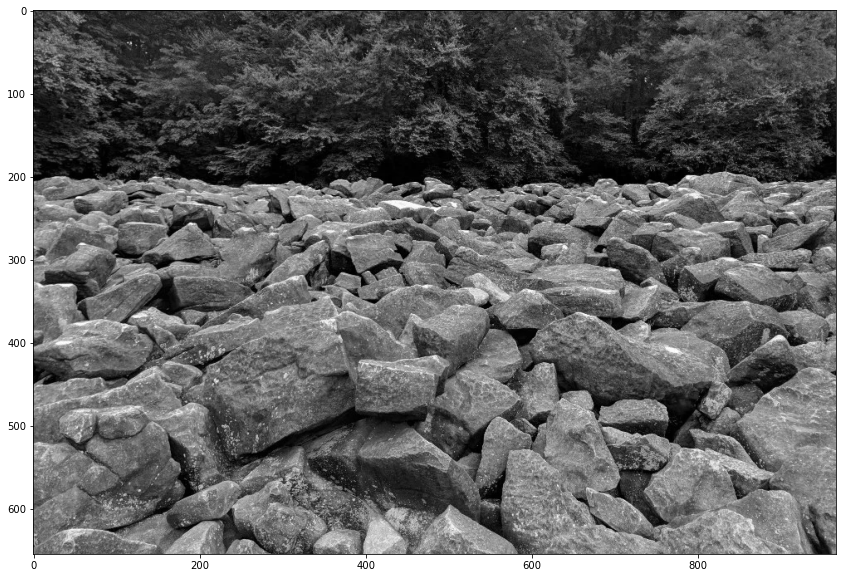

In [6]:
img = mmcv.imread('/home/euloo/Desktop/scale_1200.webp', flag='grayscale')
plt.figure(figsize=(15, 10))
plt.imshow(img, cmap='gray') # mmcv.bgr2rgb(
plt.show()

In [7]:
# Setup a checkpoint file to load
checkpoint = 'checkpoints/latest.pth'

In [8]:
# initialize the detector
model = init_detector(cfg, checkpoint, device='cuda:0')

/home/euloo/mmdetection/mmdet/apis/inference.py:42: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [9]:
model.CLASSES = ('stone', ) # UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
model.classes = model.CLASSES

/home/euloo/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
result = inference_detector(model, img)

In [11]:
#result

In [12]:
img.shape

(655, 967)

In [13]:
img = np.stack((img,)*3, axis=-1)

In [14]:
img.shape

(655, 967, 3)

In [15]:
result[0][0]

array([[5.75447632e+02, 4.21688141e+02, 6.34974670e+02, 4.93715851e+02,
        9.98949587e-01],
       [6.57083862e+02, 4.69355225e+02, 7.63462585e+02, 5.11263306e+02,
        9.97285128e-01],
       [5.05284462e+01, 2.93756012e+02, 1.53883499e+02, 3.75396698e+02,
        9.95039642e-01],
       [4.95171356e+02, 4.26848450e+02, 5.81588501e+02, 5.07862030e+02,
        9.93487239e-01],
       [6.16576355e+02, 3.62797516e+02, 7.95095520e+02, 4.70954895e+02,
        9.91536140e-01],
       [7.39019836e+02, 5.25904907e+02, 8.54754089e+02, 6.23755554e+02,
        9.90203857e-01],
       [5.60599426e+02, 4.85707245e+02, 7.11685669e+02, 6.38091980e+02,
        9.73290861e-01],
       [3.74532288e+02, 4.14373016e+02, 5.01969177e+02, 4.90551147e+02,
        9.58879769e-01],
       [1.46347961e+02, 3.07918335e+02, 4.15745514e+02, 5.48914001e+02,
        9.50450301e-01],
       [1.76495323e+01, 3.68435120e+02, 1.48440186e+02, 4.34865082e+02,
        9.49112236e-01],
       [5.90351624e+02, 2.5451

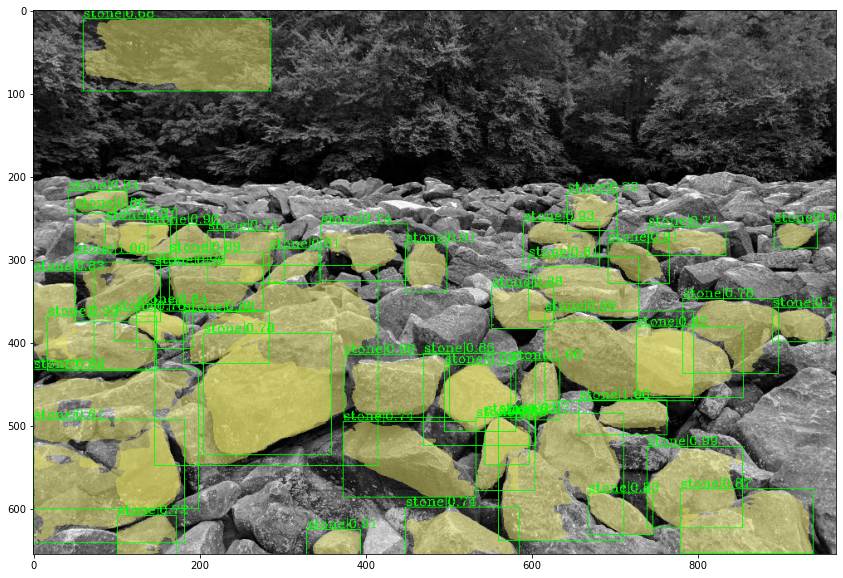

In [16]:

show_result_pyplot(model, img, result, score_thr=0.6)
